In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense ,Conv2D ,Flatten, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import numpy as np

In [2]:
# resize the images to the same size

IMG_SIZE = [224,224]

train_path = r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Training'
valid_path = r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Testing'

In [3]:
# Import the vgg19 library and add a preprocessing  layer in front of the vgg19

vgg19 = VGG19(input_shape=IMG_SIZE + [3], weights='imagenet',include_top=False)

In [4]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
# don't train existing weights

for layer in vgg19.layers:
    layer.trainable = False

In [6]:
# number of output classes

folders = glob(r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Training\*')

In [7]:
folders

['C:\\Users\\laptop\\Desktop\\Projects\\crop disease deep learning\\Training\\Early_Blight',
 'C:\\Users\\laptop\\Desktop\\Projects\\crop disease deep learning\\Training\\Healthy',
 'C:\\Users\\laptop\\Desktop\\Projects\\crop disease deep learning\\Training\\Late_Blight']

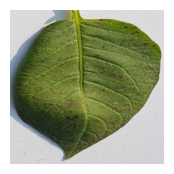

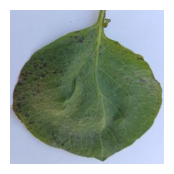

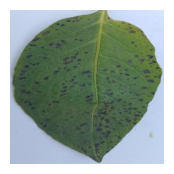

In [8]:
# Early blight images

for i in range(1,4):
    plt.figure(figsize=(2,2))
    img_path = r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Testing\Early_Blight\Early_Blight_{}.jpg'.format(i)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


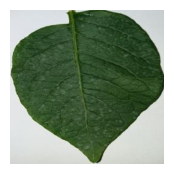

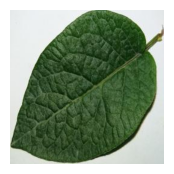

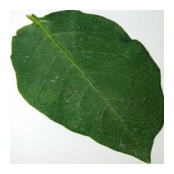

In [9]:
# Healthy images

for i in range(1,4):
    plt.figure(figsize=(2,2))
    img_path = r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Testing\Healthy\Healthy_{0}.jpg'.format(i)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

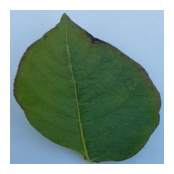

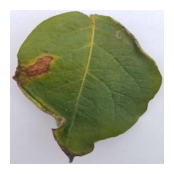

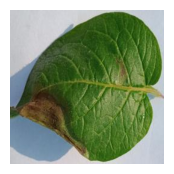

In [10]:
# late Blight images

for i in range(1,4):
    plt.figure(figsize=(2,2))
    img_path = r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Testing\Late_Blight\Late_Blight_{}.jpg'.format(i)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [11]:
x = Flatten()(vgg19.output)

In [12]:
prediction = Dense(len(folders),activation = 'softmax')(x)

# Creating model object

model = Model(inputs=vgg19.input,outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# create a model using CNN

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [15]:
#  compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# use ImageDataGenerator to load images from the datasets

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [17]:
# make sure that the target size and image size are same

training_set = train_datagen.flow_from_directory(r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Training',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 3251 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory(r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Testing',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 405 images belonging to 3 classes.


In [19]:
# fit the model

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/15


102/102 [==============================] - 213s 2s/step - loss: 1.0878 - accuracy: 0.5232 - val_loss: 0.8293 - val_accuracy: 0.6395
Epoch 2/15
102/102 [==============================] - 125s 1s/step - loss: 0.6615 - accuracy: 0.7232 - val_loss: 0.6260 - val_accuracy: 0.7481
Epoch 3/15
102/102 [==============================] - 163s 2s/step - loss: 0.5426 - accuracy: 0.7936 - val_loss: 0.5387 - val_accuracy: 0.7728
Epoch 4/15
102/102 [==============================] - 123s 1s/step - loss: 0.4411 - accuracy: 0.8397 - val_loss: 0.4165 - val_accuracy: 0.8420
Epoch 5/15
102/102 [==============================] - 120s 1s/step - loss: 0.3712 - accuracy: 0.8582 - val_loss: 0.4174 - val_accuracy: 0.8543
Epoch 6/15
102/102 [==============================] - 122s 1s/step - loss: 0.2961 - accuracy: 0.8923 - val_loss: 0.4949 - val_accuracy: 0.8494
Epoch 7/15
102/102 [==============================] - 127s 1s/step - loss: 0.2545 - accuracy: 0.9126 - val_loss: 0.2811 - val_accuracy: 0.89

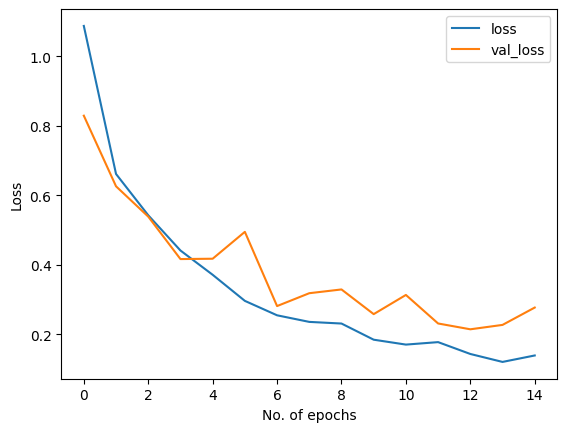

<Figure size 640x480 with 0 Axes>

In [20]:
#  loss graph

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend(loc = 'upper right')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.show()
plt.savefig('AccVal_acc')



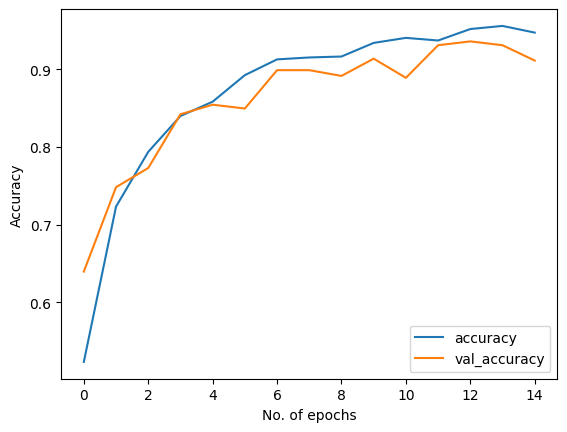

<Figure size 640x480 with 0 Axes>

In [21]:
#  accuracy graph

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend(loc = 'lower right')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save the model

model.save('model_vgg19.h5')

C:\Users\laptop\anaconda3\envs\pyml\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
y_pred = model.predict(test_set)
y_pred

13/13 [==============================] - 8s 576ms/step


array([[1.0925557e-01, 2.9989296e-06, 8.9074141e-01],
       [1.2838362e-06, 5.1808637e-09, 9.9999869e-01],
       [9.9866462e-01, 9.1353909e-04, 4.2179361e-04],
       ...,
       [4.0050639e-07, 2.9054439e-07, 9.9999940e-01],
       [9.9906772e-01, 8.9937699e-04, 3.2861153e-05],
       [6.1396725e-07, 9.7174757e-10, 9.9999940e-01]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1,
       2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0,

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [63]:
model = load_model('model_vgg19.h5')

In [64]:
img = image.load_img(r'C:\Users\laptop\Desktop\Projects\crop disease deep learning\Testing\Early_Blight\Early_Blight_9.jpg',target_size=(224,224))

In [65]:
x = image.img_to_array(img)
x

array([[[186., 192., 208.],
        [186., 192., 208.],
        [186., 192., 208.],
        ...,
        [214., 219., 238.],
        [214., 219., 238.],
        [214., 219., 238.]],

       [[186., 192., 208.],
        [186., 192., 208.],
        [186., 192., 208.],
        ...,
        [214., 219., 238.],
        [214., 219., 238.],
        [214., 219., 238.]],

       [[186., 192., 208.],
        [186., 192., 208.],
        [186., 192., 208.],
        ...,
        [214., 219., 238.],
        [214., 219., 238.],
        [214., 219., 238.]],

       ...,

       [[195., 198., 215.],
        [195., 198., 215.],
        [195., 198., 215.],
        ...,
        [222., 227., 247.],
        [222., 227., 247.],
        [222., 227., 247.]],

       [[195., 198., 215.],
        [195., 198., 215.],
        [195., 198., 215.],
        ...,
        [222., 227., 247.],
        [222., 227., 247.],
        [222., 227., 247.]],

       [[195., 198., 215.],
        [195., 198., 215.],
        [195., 1

In [66]:
x.shape

(224, 224, 3)

In [67]:
x=x/255

In [68]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [70]:
r.predict(img_data)

AttributeError: 'History' object has no attribute 'predict'

In [71]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 94ms/step


array([2], dtype=int64)

In [57]:
if(a==0):
    print('Early_Blight')
elif(a==1):
    print('Healthy')
elif(a==2):
    print('Late_Blight')
else:
    print('Invalid')

Late_Blight
